# mnist dataset 손글씨 인식 - Basic Fully Connected Layer

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers

np.random.seed(102)

In [2]:
# load mnist data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
X_train[0][15]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
         0,   0], dtype=uint8)

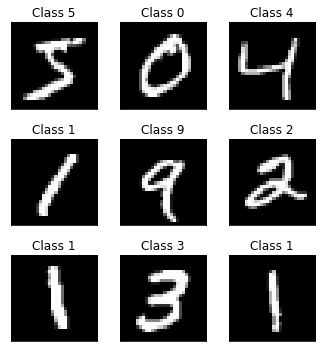

In [7]:
plt.figure(figsize=(5,5))

for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

plt.show()

## Dense layer 의 input 으로 만들기 위해 28 X 28 을 784 로 flatten

In [8]:
X_train_scaled = X_train / 255.
X_test_scaled = X_test / 255.

X_train_scaled = X_train.reshape(-1, 784).astype("float32")
X_test_scaled  = X_test.reshape(-1, 784).astype("float32")

print(X_train_scaled.shape)
print(X_test_scaled.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


## Target label 을 one-hot format, i.e.

0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0]  
1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]  
2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0]  
etc.

In [9]:
y_train_onehot = tf.keras.utils.to_categorical(y_train)
y_test_onehot = tf.keras.utils.to_categorical(y_test)

print(y_train_onehot.shape)
print(y_test_onehot.shape)

(60000, 10)
(10000, 10)


## tf.data 를 이용한 shuffling and batch 구성

In [10]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train_scaled, y_train_onehot)).shuffle(10000).batch(32)
test_ds = tf.data.Dataset.from_tensor_slices((X_test_scaled, y_test_onehot)).batch(32)

In [11]:
for train, data in train_ds.take(1):
    print(train.shape, data.shape)

(32, 784) (32, 10)


In [12]:
N_NEURONS = 128
DROPOUT = 0.2
EPOCHS = 5

In [13]:
# 2 : Hidden Layers
model = tf.keras.Sequential()
model.add(layers.Dense(N_NEURONS, input_shape=(784,)))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(DROPOUT))

model.add(layers.Dense(N_NEURONS))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(DROPOUT))

model.add(layers.Dense(10))
model.add(layers.Activation('softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
activation (Activation)      (None, 128)               0         
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1

In [15]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

In [16]:
history = model.fit(train_ds, epochs=EPOCHS, verbose=1, validation_data=test_ds)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 2.2521 - accuracy: 0.7045 - val_loss: 0.5862 - val_accuracy: 0.8599
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6841 - accuracy: 0.8302 - val_loss: 0.3662 - val_accuracy: 0.9087
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4642 - accuracy: 0.8812 - val_loss: 0.3127 - val_accuracy: 0.9222
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3802 - accuracy: 0.9013 - val_loss: 0.2450 - val_accuracy: 0.9356
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3372 - accuracy: 0.9127 - val_loss: 0.2108 - val_accuracy: 0.9452


In [17]:
score = model.evaluate(test_ds, verbose=0)

In [18]:
print(model.metrics_names)
print("Test score : {:.2f}".format(score[0]))          # evaluation of loss function
print("Test accuracy :", score[1])

['loss', 'accuracy']
Test score : 0.21
Test accuracy : 0.9452000260353088


In [19]:
# according to the trained classifier for each input example.
predicted_classes = model.predict_classes(X_test_scaled)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [20]:
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

In [21]:
print(correct_indices.shape)
print(incorrect_indices.shape)

(9452,)
(548,)


In [22]:
correct_indices[:9]

array([0, 1, 2, 3, 4, 5, 6, 7, 9])

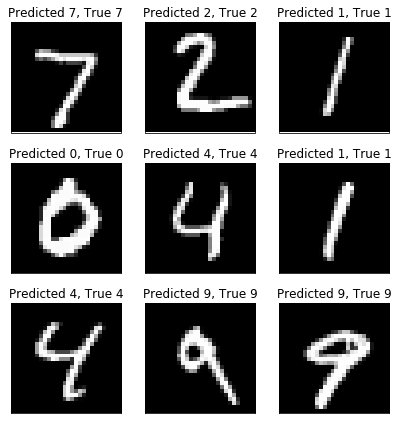

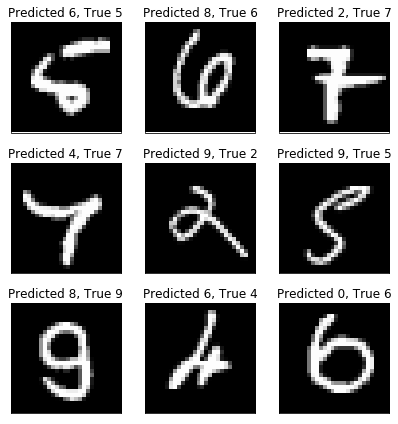

In [23]:
plt.figure(figsize=(6,6))

for i, idx in enumerate(correct_indices[:9]):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test[idx], cmap='gray')
    plt.title("Predicted {}, True {}".format(predicted_classes[idx], y_test[idx]))
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
    
plt.figure(figsize=(6,6))
for i, idx in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[idx], cmap='gray')
    plt.title("Predicted {}, True {}".format(predicted_classes[idx], y_test[idx]))
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

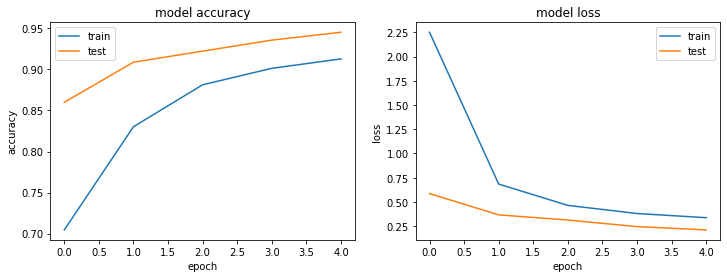

In [24]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test']);

In [25]:
np.argmax(model.predict(X_test[5].reshape((1,784))))

1